<a href="https://colab.research.google.com/github/novaRasyadina/PROJECT_AVD_Nova-Rasyadina/blob/main/Checkpoint3_AVD_Nova_Rasyadina_2409116092.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Study Kasus : Analisis Kebiasaan Bermain game Dengan Capaian Akademik Siswa**

# **Business Understanding**

# Business Objective

analisis ini bertujuan mengidentifikasi apakah terdapat korelasi antara kebiasaan bermain game dan prestasi akademik siswa. Dengan memahami pola bermain game dan dampaknya terhadap nilai akademik, hasil analisis ini diharapkan dapat membantu siswa, orang tua, dan sekolah dalam mengelola kebiasaan bermain game secara lebih bijak, sehingga prestasi akademik tetap optimal disamping bermain game.

# Assess Situation

Analisis ini melibatkan siswa, orang tua, guru, dan game. memastikan data yang dikumpulkan akurat serta mempertimbangkan faktor lain yang memengaruhi prestasi akademik. Data yang digunakan meliputi nilai akademik siswa dan informasi kebiasaan bermain game, seperti durasi, pendapatan orang tua, pendidikan orangtua dan waktu bermain. Metode analisis statistik akan digunakan untuk mengukur korelasi antara pola bermain game dan prestasi akademik siswa.

# Data Mining Goals

Untuk mengetahui pola hubungan antara kebiasaan bermain game dan prestasi akademik siswa. Selain itu, analisis ini akan mengelompokkan siswa berdasarkan pola bermain mereka guna memberikan rekomendasi yang dapat membantu mereka mengatur waktu bermain dan belajar dengan lebih efektif.

# Project Plan

Analisis ini akan dimulai dengan pengumpulan data melalui survei dan data akademik siswa. Setelah data terkumpul data dianalisis pada tahap tahap selanjutnya dengan beberapa tahap analisis untuk mendapatkan hasil dari beberapa informasi data bermain game siswa dan korelasinya terhap nilai akademik.

# **Data Understanding**

# Sumber Data

Dataset yang digunakan pada analisis ini adalah "Games and Success in Students". data ini bersumber dari Kaggle yang berisi informasi kode sekolah, intensitas bermain game, dan capaian akademik siswa.

Sumber Dataset: https://www.kaggle.com/datasets/deadier/play-games-and-success-in-students

# Struktur data

Berikut merupakan struktur data dari database ini:

* Sex (jenis kelamin) : 0 = Perempuan, 1 = Laki-laki
* School Code : Kode Sekolah
* Playing Years : Jumlah tahun bermain Game
* Playing Often : intensitas keseringan bermain game dengan skala 0-5
* Playing Hours : Rata-rata jam bermain game per hari
* Playing Game : apakah siswa bermain game skala 0-1 (tidak, bermain)
* Parent Revenue : Pendapatan orang tua dengan skala 0-4
* Father Education : Pendidikan Ayah dengan skala 1-6
* Mother Education : Pendidikan ibu dengan skala 1-6
* Grade : capaian Akademik/Nilai siswa

# Tampilan Data Keseluruhan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/ADV/gameandgrade.csv")

print(df)

     Sex  School Code  Playing Years  Playing Often  Playing Hours  \
0      0            1              1              2              1   
1      1            1              1              3              1   
2      0            1              0              0              0   
3      0            1              3              5              1   
4      1            1              1              1              2   
..   ...          ...            ...            ...            ...   
765    1            2              1              2              4   
766    1            9              2              5              1   
767    0            4              2              1              3   
768    0            4              2              1              3   
769    0            9              2              5              2   

     Playing Games  Parent Revenue  Father Education  Mother Education Grade  
0                1               4                 4                 5  77.5  
1

In [ ]:
df.head()

,Sex,School Code,Playing Years,Playing Often,Playing Hours,Playing Games,Parent Revenue,Father Education,Mother Education,Grade
0,0,1,1,2,1,1,4,4,5,77.5
1,1,1,1,3,1,1,1,3,3,83
2,0,1,0,0,0,0,1,3,3,80
3,0,1,3,5,1,1,2,2,3,45
4,1,1,1,1,2,1,1,3,4,85


# Informasi Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Sex               770 non-null    int64 
 1   School Code       770 non-null    int64 
 2   Playing Years     770 non-null    int64 
 3   Playing Often     770 non-null    int64 
 4   Playing Hours     770 non-null    int64 
 5   Playing Games     770 non-null    int64 
 6   Parent Revenue    770 non-null    int64 
 7   Father Education  770 non-null    int64 
 8   Mother Education  770 non-null    int64 
 9   Grade             770 non-null    object
dtypes: int64(9), object(1)
memory usage: 60.3+ KB


# Menghitung jumlah kemunculan kode sekolah berbeda

responden paling banyak adalah sekolah dengan kode nomor 4

In [ ]:
kolom_tertentu = "School Code"
if kolom_tertentu in df.columns:
    print(f"\nMenghitung jumlah kemunculan nilai unik dalam kolom '{kolom_tertentu}':")
    print(df[kolom_tertentu].value_counts())
else:
    print(f"\nKolom '{kolom_tertentu}' tidak ditemukan dalam dataset.")


Menghitung jumlah kemunculan nilai unik dalam kolom 'School Code':
School Code
4     148
8     140
1     112
2     106
3      66
9      50
7      41
5      34
10     32
6      21
11     20
Name: count, dtype: int64


# Menghitung rata-rata waktu bermain game

In [ ]:
print("\nMenghitung rata-rata dengan df.mean():")
print(df.mean(numeric_only=True))


Menghitung rata-rata dengan df.mean():
Sex                 0.498701
School Code         4.944156
Playing Years       1.584416
Playing Often       2.242857
Playing Hours       1.488312
Playing Games       0.706494
Parent Revenue      1.837662
Father Education    3.718182
Mother Education    3.410390
dtype: float64


# Menghitung nilai tengah dari data waktu bermain game, pendapatan orangtua, dan didikan orangtua



1.  Median dari kolom ini adalah 1.0, yang berarti bahwa separuh siswa bermain game kurang dari atau sama dengan 1 jam, sementara separuh lainnya bermain lebih dari 1 jam.
2.  pendapatan orang tua siswa dari median data ini adalah 2.0, yang menunjukkan bahwa separuh orang tua memiliki pendapatan di bawah atau sama dengan kategori 2, sementara separuh lainnya memiliki pendapatan di atas kategori tersebut.
1.  tingkat pendidikan ayah dan ibu, Median untuk ayah adalah 4.0 dan untuk ibu adalah 3.0, yang mengindikasikan bahwa tingkat pendidikan ayah umumnya lebih tinggi dibanding ibu dalam dataset ini.






In [ ]:
print("\nMenghitung median dengan df.median():")
print(df.median(numeric_only=True))


Menghitung median dengan df.median():
Sex                 0.0
School Code         4.0
Playing Years       1.0
Playing Often       2.0
Playing Hours       1.0
Playing Games       1.0
Parent Revenue      2.0
Father Education    4.0
Mother Education    3.0
dtype: float64


# Menghitung Standar Devisiasi

Perhitungan standar deviasi mengukur variasi data. Playing Hours (1.34) memiliki variasi sedang, menunjukkan perbedaan kebiasaan bermain antar siswa. Parent Revenue (1.06) memiliki variasi rendah, menandakan sebagian besar pendapatan orang tua tidak terlalu jauh dari rata-rata. Father dan Mother Education (1.17) juga menunjukkan variasi sedang/imbang dalam tingkat pendidikan orang tua.

In [ ]:
print("\nMenghitung standar deviasi dengan df.std():")
print(df.std(numeric_only=True))


Menghitung standar deviasi dengan df.std():
Sex                 0.500323
School Code         2.999913
Playing Years       1.407306
Playing Often       1.923635
Playing Hours       1.337853
Playing Games       0.458509
Parent Revenue      1.064077
Father Education    1.171756
Mother Education    1.176447
dtype: float64


# Menghitung Korelasi Antar Kolom Numerik Dalam Data Yang Merepresentasikan Hubungannya dengan Capaian Siswa

In [ ]:
print("\nMenghitung korelasi antar kolom numerik dengan df.corr():")
print(df.corr(numeric_only=True))


Menghitung korelasi antar kolom numerik dengan df.corr():
                       Sex  School Code  Playing Years  Playing Often  \
Sex               1.000000     0.003850       0.388920       0.164492   
School Code       0.003850     1.000000      -0.073268      -0.109867   
Playing Years     0.388920    -0.073268       1.000000       0.437947   
Playing Often     0.164492    -0.109867       0.437947       1.000000   
Playing Hours     0.418638    -0.111136       0.749567       0.428329   
Playing Games     0.344120    -0.149015       0.725660       0.754702   
Parent Revenue    0.105856    -0.234231       0.142460       0.074557   
Father Education  0.018229     0.115377       0.042440       0.006750   
Mother Education  0.016372     0.102671       0.070159       0.030028   

                  Playing Hours  Playing Games  Parent Revenue  \
Sex                    0.418638       0.344120        0.105856   
School Code           -0.111136      -0.149015       -0.234231   
Playing Year

# Menghitung frequensi siswa bermain game dan korelasinya dengan nilai siswa

In [ ]:
df.groupby("Playing Games")["Grade"].describe()

,count,unique,top,freq
Playing Games,,,,
0,227,54,100,42
1,542,87,100,62
2,1,1,40,1


# Data Preparation

Sumber Dataset: https://www.kaggle.com/datasets/deadier/play-games-and-success-in-students

Memiliki 770 baris dan 10 kolom

# Informasi Data

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ADV/gameandgrade.csv")
print(df)

     Sex  School Code  Playing Years  Playing Often  Playing Hours  \
0      0            1              1              2              1   
1      1            1              1              3              1   
2      0            1              0              0              0   
3      0            1              3              5              1   
4      1            1              1              1              2   
..   ...          ...            ...            ...            ...   
765    1            2              1              2              4   
766    1            9              2              5              1   
767    0            4              2              1              3   
768    0            4              2              1              3   
769    0            9              2              5              2   

     Playing Games  Parent Revenue  Father Education  Mother Education Grade  
0                1               4                 4                 5  77.5  
1

# Melihat Missing Value pada dataset

In [ ]:
print((df.isna().sum() / len(df)) * 100)

Sex                 0.0
School Code         0.0
Playing Years       0.0
Playing Often       0.0
Playing Hours       0.0
Playing Games       0.0
Parent Revenue      0.0
Father Education    0.0
Mother Education    0.0
Grade               0.0
dtype: float64


dari hasil analisis tidak ditemukan missing value/nilai hilang

# Duplicated Values

kondisi dimana ada data yang muncul beberapa kali dalam satu data set

In [ ]:
df[df.duplicated()]

,Sex,School Code,Playing Years,Playing Often,Playing Hours,Playing Games,Parent Revenue,Father Education,Mother Education,Grade
278,0,4,0,0,0,0,2,3,4,70
367,0,4,0,0,0,0,1,3,2,70
419,0,5,0,0,0,0,2,5,4,100
468,0,7,0,0,0,0,0,4,4,100
478,0,7,0,0,0,0,0,5,5,100
480,0,7,0,0,0,0,0,6,6,100
610,0,9,0,0,0,0,0,5,5,100
616,0,9,0,0,0,0,0,6,6,100
617,0,9,0,0,0,0,0,5,6,100
618,0,9,0,0,0,0,0,6,6,100


Karena dataset ini adalah sebuah survey, jadi terdapat banyak kemunculan data yang sama, maka dari itu tidak perlu melakukan drop atau menghapus data yang sama

# Outliers

Melakukan pengecekan outliers

In [ ]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
Sex,0.000000
School Code,0.000000
Playing Years,0.000000
Playing Often,0.000000
Playing Hours,0.000000
Playing Games,0.000000
Parent Revenue,6.493506
Father Education,0.000000
Mother Education,0.000000


hanya Parent Revenue yang memiliki outliers sekitar 6.49%, Kolom lainnya tidak memiliki outliers yang signifikan. karena ini merupakan data survey, outliers tidak perlu dihapus, karena Data skala biasanya bersifat subjektif, jadi meskipun ada nilai ekstrem, itu masih bisa mencerminkan persepsi responden. Menghapus outliers bisa menghilangkan informasi penting, terutama jika ada kelompok responden dengan pandangan atau kondisi yang berbeda.

# Inconsistent Values

In [ ]:
df

,Sex,School Code,Playing Years,Playing Often,Playing Hours,Playing Games,Parent Revenue,Father Education,Mother Education,Grade
0,0,1,1,2,1,1,4,4,5,77.5
1,1,1,1,3,1,1,1,3,3,83
2,0,1,0,0,0,0,1,3,3,80
3,0,1,3,5,1,1,2,2,3,45
4,1,1,1,1,2,1,1,3,4,85
...,...,...,...,...,...,...,...,...,...,...
765,1,2,1,2,4,1,1,3,3,67.5
766,1,9,2,5,1,1,2,5,5,100
767,0,4,2,1,3,1,4,5,4,75
768,0,4,2,1,3,1,2,4,4,77


# Pengecekan nilai tidak konsisten

Berdasarkan hasil pengecekan sebelumnya semua kolom memiliki nilai dalam rentang yang wajar berdasarkan skala survei (responden). Tidak ditemukan nilai aneh atau tidak konsisten dalam dataset, dan hal ini kembali lagi pada bentuk dataset yang berupa survey dari responsen yang bisa saja memiliki respon sama dalam rentang skala

In [ ]:
for col in ["Sex", "School Code", "Playing Games"]:
    df[col] = df[col].fillna('')
    df[col] = df[col].astype(str)
    df[col] = df[col].str.lower().str.strip()
    df[col] = df[col].str.replace(r'[^a-z0-9\s]', '', regex=True)
    df[col] = df[col].str.title()

In [ ]:
df

,Sex,School Code,Playing Years,Playing Often,Playing Hours,Playing Games,Parent Revenue,Father Education,Mother Education,Grade
0,0,1,1,2,1,1,4,4,5,77.5
1,1,1,1,3,1,1,1,3,3,83
2,0,1,0,0,0,0,1,3,3,80
3,0,1,3,5,1,1,2,2,3,45
4,1,1,1,1,2,1,1,3,4,85
...,...,...,...,...,...,...,...,...,...,...
765,1,2,1,2,4,1,1,3,3,67.5
766,1,9,2,5,1,1,2,5,5,100
767,0,4,2,1,3,1,4,5,4,75
768,0,4,2,1,3,1,2,4,4,77


# Data Construction

Karena analisis ini untuk mengetahui hubungan bermain game dengan capaian akademik siswa, jadi data construction bisa digunakan untuk membuat fitur baru seperti total waktu bermain per minggu, kategori pemain game, atau rata-rata pendidikan orang tua.

In [ ]:
df["Total Gaming Hours Per Week"] = df["Playing Often"] * df["Playing Hours"]

In [ ]:
def categorize_gamer(hours):
    if hours == 0:
        return "Non-Gamer"
    elif hours <= 5:
        return "Casual"
    elif hours <= 15:
        return "Regular"
    else:
        return "Hardcore"

df["Gamer Category"] = df["Total Gaming Hours Per Week"].apply(categorize_gamer)

In [ ]:
df["Parent Education Avg"] = (df["Father Education"] + df["Mother Education"]) / 2

In [ ]:
print(df.head())

  Sex School Code  Playing Years  Playing Often  Playing Hours Playing Games  \
0   0           1              1              2              1             1   
1   1           1              1              3              1             1   
2   0           1              0              0              0             0   
3   0           1              3              5              1             1   
4   1           1              1              1              2             1   

   Parent Revenue  Father Education  Mother Education Grade  \
0               4                 4                 5  77.5   
1               1                 3                 3    83   
2               1                 3                 3    80   
3               2                 2                 3    45   
4               1                 3                 4    85   

   Total Gaming Hours Per Week Gamer Category  Parent Education Avg  
0                            2         Casual                   4.5  


# Data Reduction

In [ ]:
def categorize_revenue(revenue):
    if revenue <= 2:
        return "Low"
    elif revenue <= 4:
        return "Medium"
    else:
        return "High"

df["Parent Revenue Category"] = df["Parent Revenue"].apply(categorize_revenue)

In [ ]:
df.drop(columns=["Parent Revenue"], inplace=True)

In [ ]:
df.head()

,Sex,School Code,Playing Years,Playing Often,Playing Hours,Playing Games,Father Education,Mother Education,Grade,Total Gaming Hours Per Week,Gamer Category,Parent Education Avg,Parent Revenue Category
0,0,1,1,2,1,1,4,5,77.5,2,Casual,4.5,Medium
1,1,1,1,3,1,1,3,3,83,3,Casual,3.0,Low
2,0,1,0,0,0,0,3,3,80,0,Non-Gamer,3.0,Low
3,0,1,3,5,1,1,2,3,45,5,Casual,2.5,Low
4,1,1,1,1,2,1,3,4,85,2,Casual,3.5,Low


# Visualisasi

In [ ]:
df['Grade'] = pd.to_numeric(df['Grade'], errors='coerce')

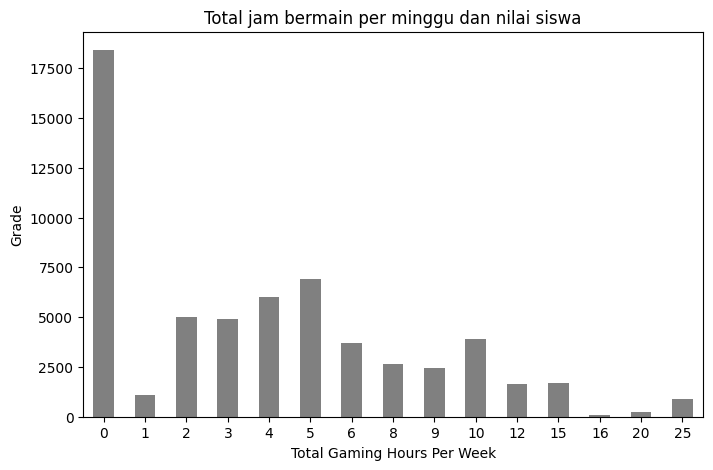

In [ ]:
#Bar Chart Mathplotlib
plt.figure(figsize=(8, 5))
df.groupby('Total Gaming Hours Per Week') ['Grade'].sum().plot(kind='bar', color= 'grey')
plt.title('Total jam bermain per minggu dan nilai siswa')
plt.xlabel('Total Gaming Hours Per Week')
plt.ylabel('Grade')
plt.xticks(rotation=0)
plt.show()

<ipython-input-40-ea5ea7143eb6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Gaming Hours Per Week', y='Grade', data=df, palette='pastel')


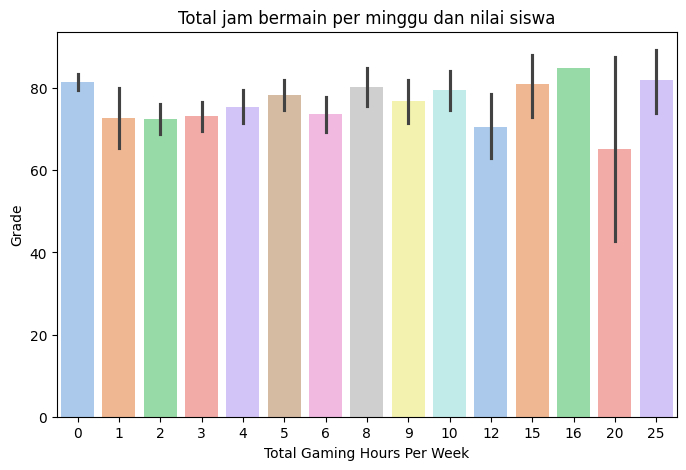

In [ ]:
# Bar Chart (Seaborn)
plt.figure(figsize=(8, 5))
sns.barplot(x='Total Gaming Hours Per Week', y='Grade', data=df, palette='pastel')
plt.title('Total jam bermain per minggu dan nilai siswa')
plt.xlabel('Total Gaming Hours Per Week')
plt.ylabel('Grade')
plt.xticks(rotation=0)
plt.show()

<ipython-input-35-7164fdc3e2dd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Playing Hours"], y=df["Grade"], palette="Set2")


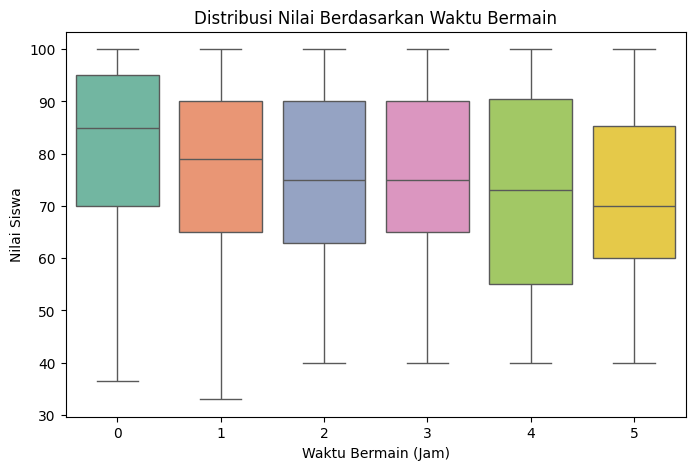

In [ ]:
#Boxplot seaborn distribusi nilai siswa berdasarkan waktu bermain
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Playing Hours"], y=df["Grade"], palette="Set2")
plt.title("Distribusi Nilai Berdasarkan Waktu Bermain")
plt.xlabel("Waktu Bermain (Jam)")
plt.ylabel("Nilai Siswa")
plt.show()

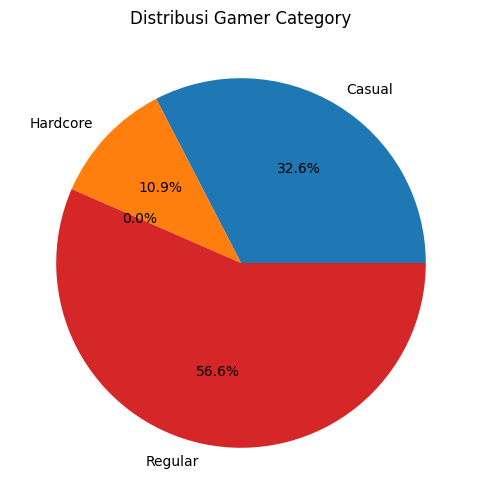

In [ ]:
# Pie Chart distribusi Gamer Ctegory
plt.figure(figsize=(6, 6))
df.groupby("Gamer Category")["Total Gaming Hours Per Week"].sum().plot(kind="pie", autopct="%1.1f%%")
plt.title('Distribusi Gamer Category')
plt.ylabel('')
plt.show()


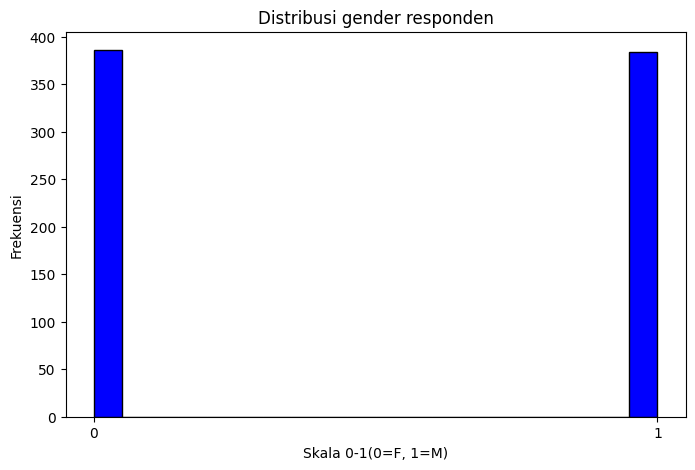

In [ ]:
#Histogram distribusi gender responden (matplotlib)
plt.figure(figsize=(8, 5))
plt.hist(df['Sex'], bins=20, color='blue', edgecolor='black')
plt.title('Distribusi gender responden')
plt.xlabel('Skala 0-1(0=F, 1=M)')
plt.ylabel('Frekuensi')
plt.show()

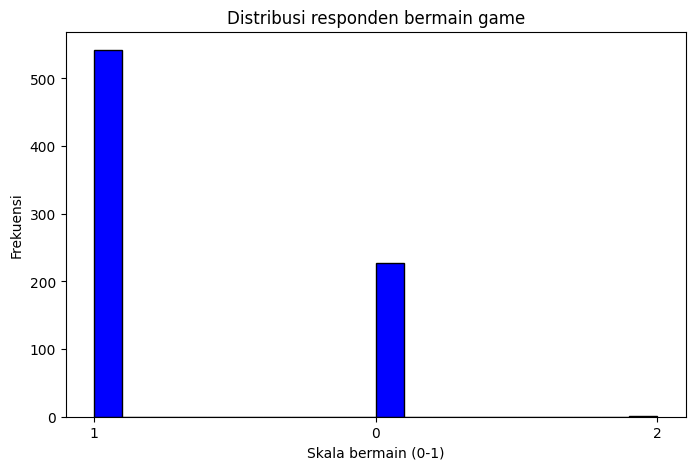

In [ ]:
#Histogram distribusi responden(siswa) yang bermain game(matplotlib)
plt.figure(figsize=(8, 5))
plt.hist(df['Playing Games'], bins=20, color='blue', edgecolor='black')
plt.title('Distribusi responden bermain game')
plt.xlabel('Skala bermain (0-1)')
plt.ylabel('Frekuensi')
plt.show()

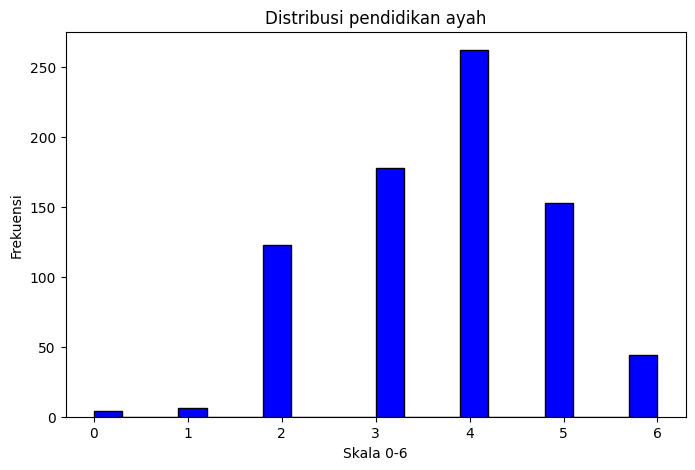

In [ ]:
#Histogram distribusi pendidikan ayah(matplotlib)
plt.figure(figsize=(8, 5))
plt.hist(df['Father Education'], bins=20, color='blue', edgecolor='black')
plt.title('Distribusi pendidikan ayah')
plt.xlabel('Skala 0-6')
plt.ylabel('Frekuensi')
plt.show()

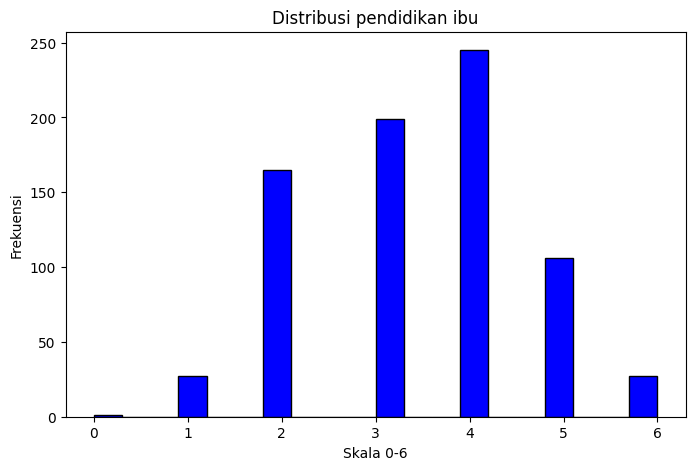

In [ ]:
#Histogram distribusi pendidikan ibu
plt.figure(figsize=(8, 5))
plt.hist(df['Mother Education'], bins=20, color='blue', edgecolor='black')
plt.title('Distribusi pendidikan ibu')
plt.xlabel('Skala -6')
plt.ylabel('Frekuensi')
plt.show()

Dari beberapa visualisasi diatas, Sebagian besar siswa memiliki jam bermain yang rendah (0–5 jam per minggu).
Ada sedikit siswa yang bermain lebih dari 10 jam per minggu.
Distribusi nilai (grade) tampaknya lebih tinggi pada kelompok yang memiliki jam bermain rendah, dan distribusi siswa bermain game lebih dominan daripada siswa tidak bermain game. tetapi korelasi waktu yang menunjukan semakin banyak bermain game, nilai semakin rendah. dari hasil visualisasi tidak menunjukan hasil yang signifikan antara waktu bermain dengan copaian akademik sebagian besar responden, tetapi ada kecenderungan korelasi negatif.
terdapat beberapa tindakan yang dapat dilakukan untuk mengatasi korelas negatif yang di tunjukan oleh beberapa visualisasi diatas terhadap kebiasaan bermain siswa dengan capaian akademik antara lain:


*   Mengajarkan siswa cara menyeimbangkan waktu antara belajar dan bermain game.
*   Mendorong penggunaan teknik seperti Pomodoro (belajar dalam interval waktu) agar siswa tetap bisa bermain tanpa mengorbankan akademik.
*   Mengajarkan pentingnya prioritas tugas sebelum bermain game.
*   dari distribusi pendidikan orangtua, pendidikan ayah lebih tinggi dibanding ibu yang mengindikasi bahwa ayah lebih peka terhadap pengawasan waktu bermain terhadap siswa
*   Mengajarkan pentingnya prioritas tugas sebelum bermain game.
*   Orang tua dan guru bisa menerapkan aturan batas waktu bermain per hari/minggu.
* Menggunakan fitur Parental Control atau Self-Tracking Apps untuk memantau durasi bermain.
* Mendorong siswa untuk mengalokasikan waktu bermain sebagai reward setelah belajar.
* Menggunakan game edukatif yang bisa meningkatkan keterampilan berpikir logis, problem-solving, atau kreativitas.
* Jika siswa tertarik pada game, arahkan mereka ke coding, desain game, atau eSports profesional yang memiliki nilai akademik.
* Jika game menjadi pengganti aktivitas sosial, dorong siswa untuk lebih banyak berinteraksi dengan teman atau ikut kegiatan ekstrakurikuler.
* Jika siswa menunjukkan tanda-tanda kecanduan game, bisa diarahkan ke konseling atau terapi digital detox.




